# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | trairi
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | linxia chengguanzhen
Processing Record 11 of Set 1 | changsha
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | egilsstadir
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | lensk
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | khandyga
Processing Record 22 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,20.86,96,97,1.34,EC,1730335777
1,port elizabeth,-33.9180,25.5701,16.29,88,75,2.06,ZA,1730335779
2,port alfred,-33.5906,26.8910,12.88,96,5,3.65,ZA,1730335780
3,port-aux-francais,-49.3500,70.2167,4.25,85,32,12.17,TF,1730335781
4,tiksi,71.6872,128.8694,-24.06,100,77,1.42,RU,1730335782


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,20.86,96,97,1.34,EC,1730335777
1,port elizabeth,-33.9180,25.5701,16.29,88,75,2.06,ZA,1730335779
2,port alfred,-33.5906,26.8910,12.88,96,5,3.65,ZA,1730335780
3,port-aux-francais,-49.3500,70.2167,4.25,85,32,12.17,TF,1730335781
4,tiksi,71.6872,128.8694,-24.06,100,77,1.42,RU,1730335782


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

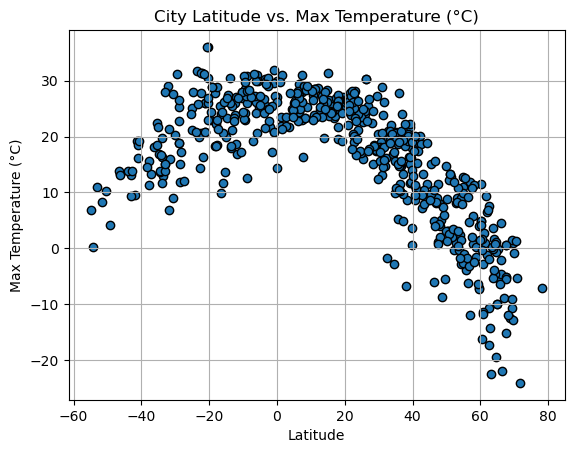

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

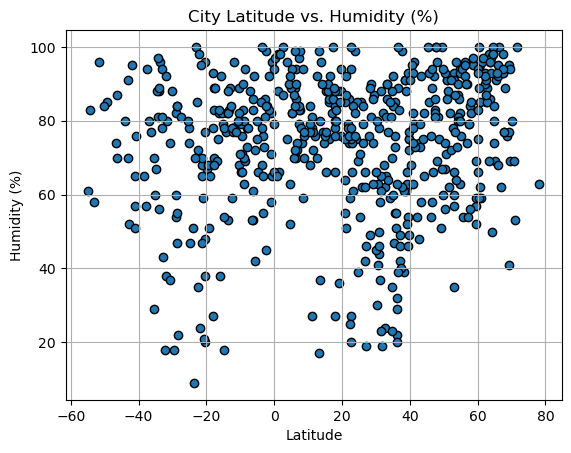

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

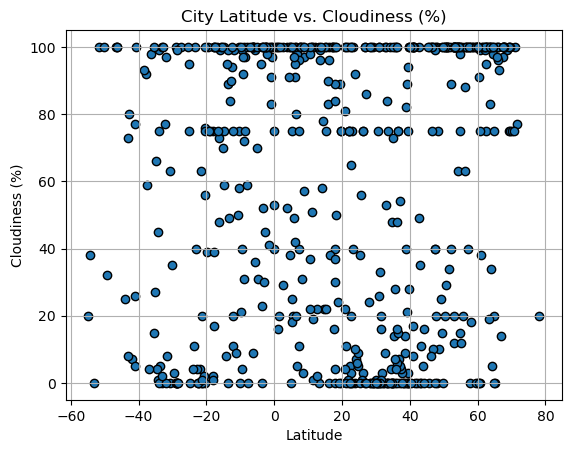

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

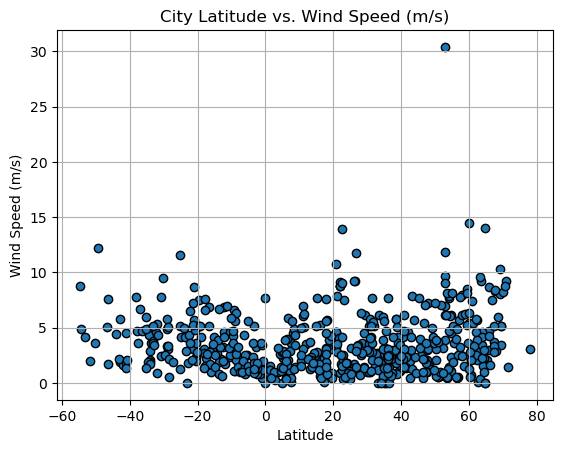

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, hemisphere, variable, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (min(x) + 5, min(y) + 5), fontsize=15, color="red")
    plt.title(f"{hemisphere} Hemisphere: {variable} vs. Latitude")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    print(f"The r-squared is: {r_value**2:.3f}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere= city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tiksi,71.6872,128.8694,-24.06,100,77,1.42,RU,1730335782
7,georgetown,5.4112,100.3354,25.97,89,20,1.54,MY,1730335785
9,linxia chengguanzhen,35.6003,103.2064,5.18,76,100,0.02,CN,1730335788
10,changsha,28.2000,112.9667,15.09,49,0,2.52,CN,1730335789
11,jamestown,42.0970,-79.2353,20.01,54,0,4.63,US,1730335790


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,20.86,96,97,1.34,EC,1730335777
1,port elizabeth,-33.9180,25.5701,16.29,88,75,2.06,ZA,1730335779
2,port alfred,-33.5906,26.8910,12.88,96,5,3.65,ZA,1730335780
3,port-aux-francais,-49.3500,70.2167,4.25,85,32,12.17,TF,1730335781
5,invercargill,-46.4000,168.3500,13.34,87,100,7.60,NZ,1730335693


###  Temperature vs. Latitude Linear Regression Plot

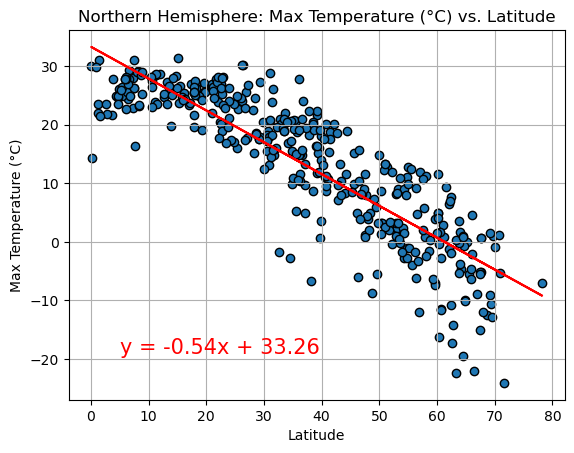

The r-squared is: 0.759


In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"],
                        "Northern", "Max Temperature (°C)", "Latitude", "Max Temperature (°C)")

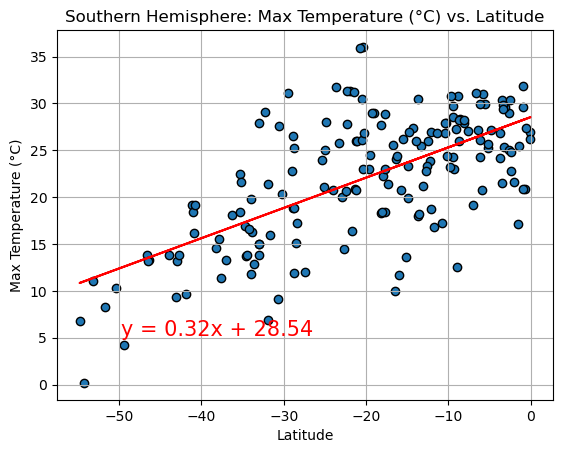

The r-squared is: 0.427


In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"],
                       "Southern", "Max Temperature (°C)", "Latitude", "Max Temperature (°C)")

**Discussion about the linear relationship:** In the Northern Hemisphere, the scatter plot for latitude versus temperature generally shows a negative slope, indicating that as we move further north from the equator, temperatures tend to decrease. This trend aligns with expectations, as regions closer to the equator receive more direct sunlight throughout the year, resulting in higher temperatures. In the Southern Hemisphere, the trend is similar but inversely plotted, with a positive slope showing that temperatures increase as latitude approaches the equator from the south. Overall, there is a strong linear relationship between latitude and temperature, with proximity to the equator consistently leading to higher temperatures in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

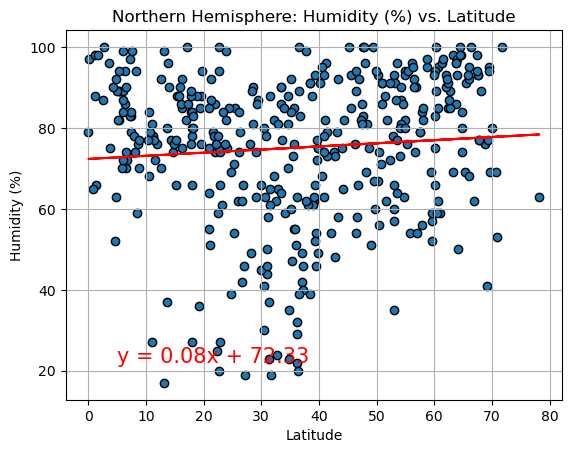

The r-squared is: 0.007


In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"],
                       "Northern", "Humidity (%)", "Latitude", "Humidity (%)")

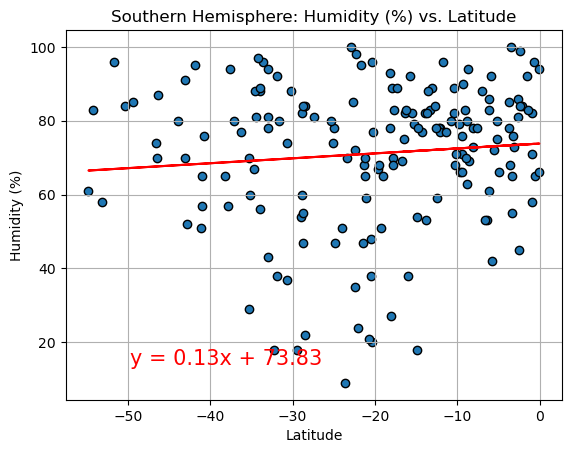

The r-squared is: 0.009


In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"],
                       "Southern", "Humidity (%)", "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** In the Northern Hemisphere, the scatter plot for latitude versus humidity shows a weak and unclear trend, with points scattered widely, suggesting that humidity is influenced by factors beyond latitude, such as local geography, proximity to water bodies, and seasonal weather patterns. The Southern Hemisphere displays a similarly dispersed relationship, with low correlation and considerable variation in humidity across latitudes. Overall, latitude does not significantly influence humidity levels, as humidity is more complexly determined by regional atmospheric conditions, landforms, and distance from large water bodies.

### Cloudiness vs. Latitude Linear Regression Plot

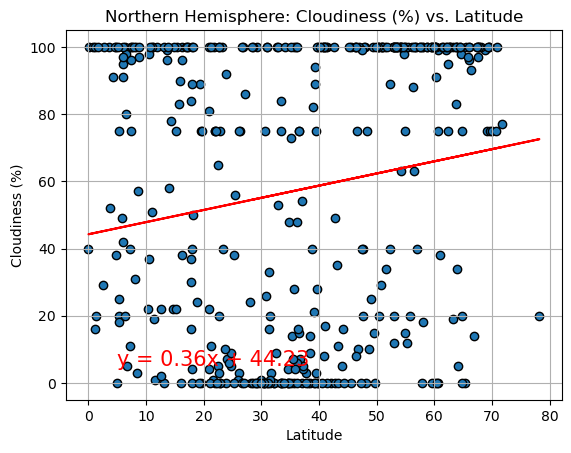

The r-squared is: 0.028


In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"],
                       "Northern", "Cloudiness (%)", "Latitude", "Cloudiness (%)")

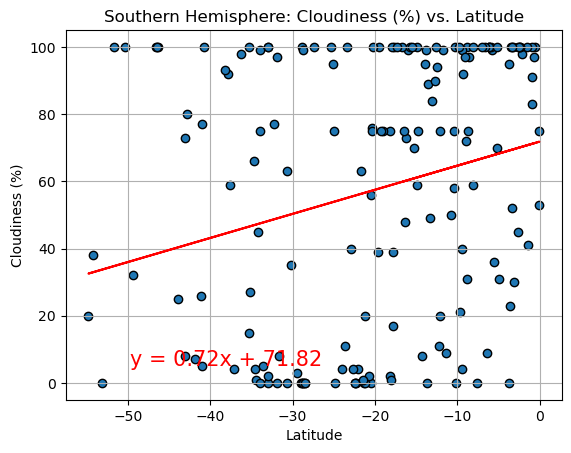

The r-squared is: 0.059


In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"],
                       "Southern", "Cloudiness (%)", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** In the Northern Hemisphere, cloudiness data shows substantial scatter, with no strong linear trend, as cloudiness can vary greatly within a given latitude due to regional weather patterns and prevailing winds, making direct correlation with latitude challenging. In the Southern Hemisphere, cloudiness similarly lacks a strong linear pattern, as it is influenced by numerous localized weather systems rather than latitude. Overall, there is minimal evidence of a clear relationship between latitude and cloudiness, indicating that other meteorological factors likely drive cloudiness patterns.

### Wind Speed vs. Latitude Linear Regression Plot

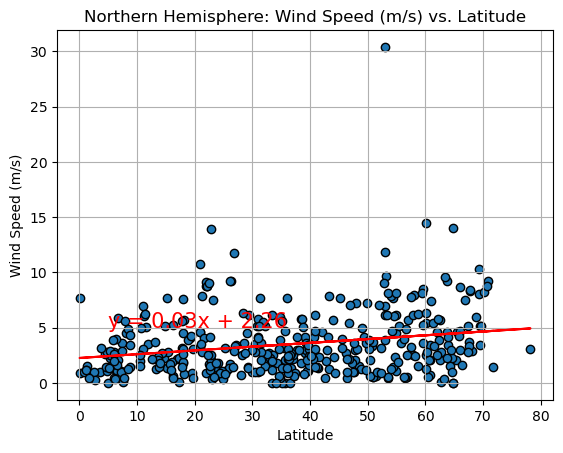

The r-squared is: 0.051


In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"],
                       "Northern", "Wind Speed (m/s)", "Latitude", "Wind Speed (m/s)")

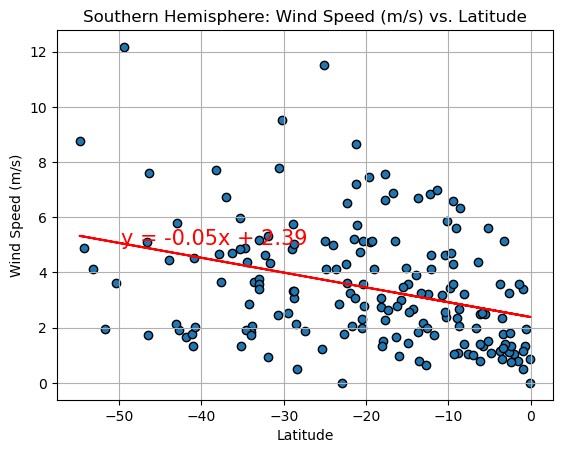

The r-squared is: 0.113


In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"],
                       "Southern", "Wind Speed (m/s)", "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** In the Northern Hemisphere, wind speed data shows slight variations across latitude but lacks a strong correlation, as wind speed is influenced by factors like atmospheric pressure differences, geographical barriers, and seasonal systems (such as jet streams or ocean currents), making latitude alone a poor predictor. Similarly, the Southern Hemisphere data display minimal correlation, with wind speeds widely distributed without a clear trend relative to latitude. Overall, wind speed does not consistently relate to latitude, reflecting its dependence on other dynamic atmospheric conditions, pressure systems, and local geographic influences.